In [1]:
#----------------PROBLEM 4 SET UP-----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from matplotlib.colors import ListedColormap

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Extract data from CSV
train_df = pd.read_csv("HW3train.csv", header = None)
print(train_df.head())
train_y = train_df.iloc[:, 0]
train_x = train_df.iloc[:, [1,2]]
train_x1 = train_df.iloc[:, 1]
train_x2 = train_df.iloc[:, 2]

test_df = pd.read_csv("HW3test.csv", header = None)
print(test_df.head())
test_y = test_df.iloc[:, 0]
test_x = test_df.iloc[:, [1,2]]
test_x1 = test_df.iloc[:, 1]
test_x2 = test_df.iloc[:, 2]

h = .03  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh 
x1_min, x1_max = train_x.iloc[:, 0].min() - 1, train_x.iloc[:, 0].max() + 1
x2_min, x2_max = train_x.iloc[:, 1].min() - 1, train_x.iloc[:, 1].max() + 1
x1mesh, x2mesh = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

# Create color maps
cmap_light = ListedColormap(['lightblue', 'lightcoral', 'grey'])
cmap_bold = ListedColormap(['blue', 'red', 'black'])


   0     1     2
0  1  0.78  1.99
1  3  0.02 -1.44
2  2  0.62 -1.14
3  1  1.52  0.54
4  2  0.48 -2.43
   0     1     2
0  1 -1.82 -0.98
1  1  0.62  1.50
2  3  0.60  0.63
3  1  1.31  0.38
4  3 -0.55  0.08


Working on tree depth of 1
	The training accuracy is 0.61
Working on tree depth of 2
	The training accuracy is 0.80
Working on tree depth of 3
	The training accuracy is 0.85
Working on tree depth of 4
	The training accuracy is 0.94
Working on tree depth of 10
	The training accuracy is 1.00


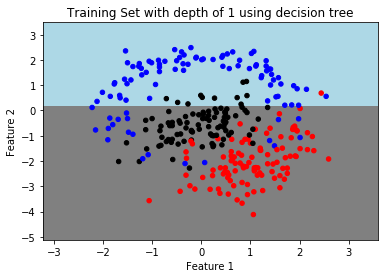

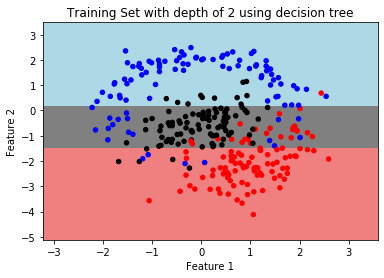

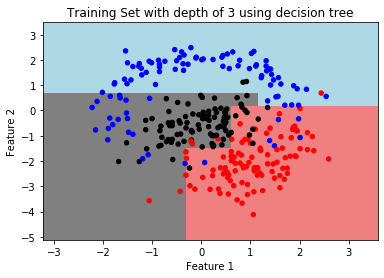

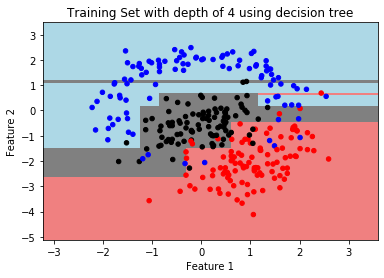

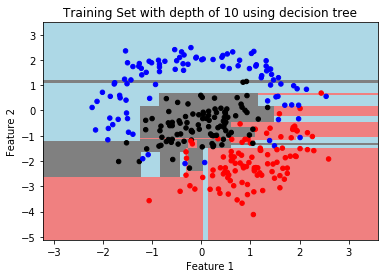

In [2]:
for depth in [1,2,3,4,10]:
    # we create an instance of Neighbours Classifier and fit the data.
    
    clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=depth)
    clf.fit(train_x, train_y)

    Z = clf.predict(np.c_[x1mesh.ravel(), x2mesh.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(x1mesh.shape)

    # Plot the training points with the mesh
    plt.figure()
    plt.pcolormesh(x1mesh, x2mesh, Z, cmap=cmap_light)
    ytrain_colors = [y-1 for y in train_y]
    plt.scatter(train_x.iloc[:, 0], train_x.iloc[:, 1], c=ytrain_colors, cmap=cmap_bold, s=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('Training Set with depth of %i using decision tree' % (depth))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    #Report training and testing accuracies
    print('Working on tree depth of %i'%(depth))
    trainacc =  clf.score(train_x,train_y) 
    testacc = clf.score(test_x,test_y) 
    print('\tThe training accuracy is %.2f'%(trainacc))

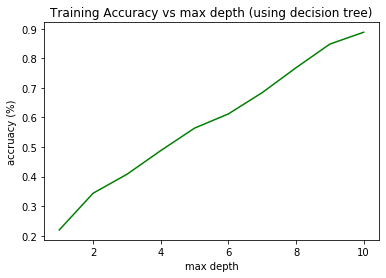

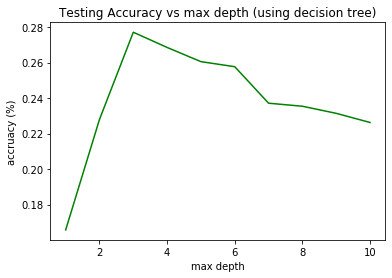

Best max_depth is 3
Testing accuracies: [0.1657142857142857, 0.228, 0.27714285714285714, 0.26857142857142857, 0.26057142857142856, 0.25771428571428573, 0.23714285714285716, 0.23542857142857143, 0.23142857142857143, 0.22628571428571428]


In [14]:
train_acc_list =[]
test_acc_list = []
for depth in range(1,11):
    # we create an instance of Neighbours Classifier and fit the data.
    
    clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=depth)
    clf.fit(train_x, train_y)
    trainacc =  clf.score(train_x,train_y) 
    testacc = clf.score(test_x,test_y)
    train_acc_list.append(trainacc)
    test_acc_list.append(testacc)

plt.plot(list(range(1,11)), train_acc_list, color = 'green')
plt.title("Training Accuracy vs max depth (using decision tree)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.show()

plt.plot(list(range(1,11)), test_acc_list, color = 'green')
plt.title("Testing Accuracy vs max depth (using decision tree)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.show()

best_index = test_acc_list.index(max(test_acc_list)) + 1
print("Best max_depth is " + str(best_index))
print("Testing accuracies: " + str(test_acc_list))

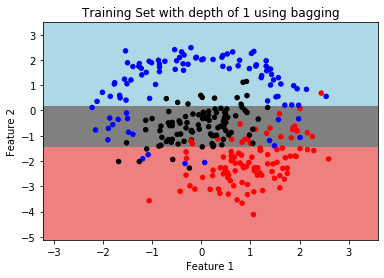

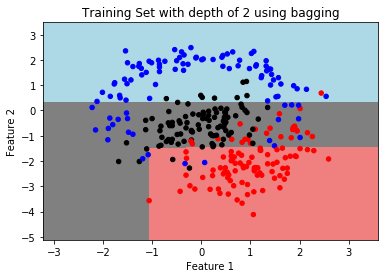

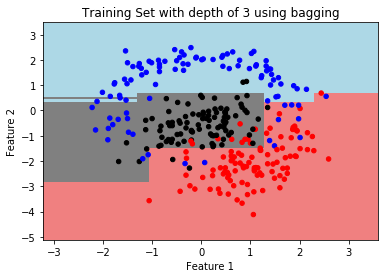

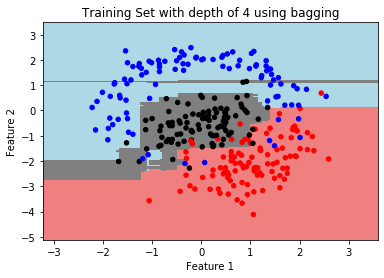

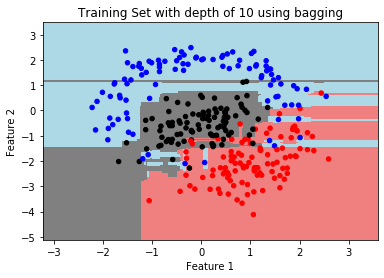

In [4]:
best_numtrees = []
for depth in [1,2,3,4,10]:
    # we create an instance of Neighbours Classifier and fit the data.
    numtreerange = [1,5,10,25,50,100,200]
    best_score = 0
    
    for num_trees in numtreerange:
        clf=RandomForestClassifier(bootstrap=True,n_estimators=num_trees,max_features=None,criterion='gini',max_depth=depth)

        clf.fit(train_x, train_y)

        #Report training and testing accuracies
        trainacc =  clf.score(train_x,train_y) 
        testacc = clf.score(test_x,test_y)
        if(testacc > best_score):
            best_score = testacc
            best_clf = clf
        
    Z = best_clf.predict(np.c_[x1mesh.ravel(), x2mesh.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(x1mesh.shape)

    # Plot the training points with the mesh
    plt.figure()
    plt.pcolormesh(x1mesh, x2mesh, Z, cmap=cmap_light)
    ytrain_colors = [y-1 for y in train_y]
    plt.scatter(train_x.iloc[:, 0], train_x.iloc[:, 1], c=ytrain_colors, cmap=cmap_bold, s=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('Training Set with depth of %i using bagging' % (depth))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    best_numtrees.append(best_clf.n_estimators)

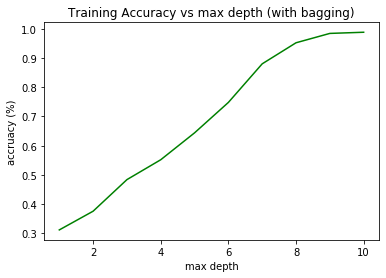

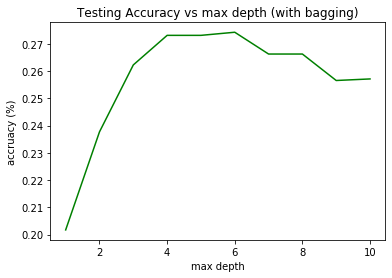

Best max_depth is 6 with a num_trees of: 200
Testing accuracies: [0.2017142857142857, 0.2377142857142857, 0.2622857142857143, 0.27314285714285713, 0.27314285714285713, 0.2742857142857143, 0.2662857142857143, 0.2662857142857143, 0.25657142857142856, 0.2571428571428571]


In [15]:
train_acc_list =[]
test_acc_list = []
best_train_acc = 0
best_test_acc = 0
best_num_trees = []

for depth in range(1,11):
    # we create an instance of Neighbours Classifier and fit the data.
    numtreerange = [1,5,10,25,50,100,200]
    best_score = 0
    
    best_clf = None
    for num_trees in numtreerange:
        clf=RandomForestClassifier(bootstrap=True,n_estimators=num_trees,max_features=None,criterion='gini',max_depth=depth)

        clf.fit(train_x, train_y)

        #Report training and testing accuracies
        trainacc =  clf.score(train_x,train_y) 
        testacc = clf.score(test_x,test_y)
        if(testacc > best_score):
            best_test_acc = testacc
            best_train_acc = trainacc
            best_clf = clf
            
    best_num_trees.append(best_clf.n_estimators)
    train_acc_list.append(best_train_acc)
    test_acc_list.append(best_test_acc)   
    
plt.plot(list(range(1,11)), train_acc_list, color = 'green')
plt.title("Training Accuracy vs max depth (with bagging)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.show()

plt.plot(list(range(1,11)), test_acc_list, color = 'green')
plt.title("Testing Accuracy vs max depth (with bagging)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.show()


best_index = test_acc_list.index(max(test_acc_list)) + 1
print("Best max_depth is " + str(best_index) + " with a num_trees of: " + str(best_num_trees[best_index]))
print("Testing accuracies: " + str(test_acc_list))

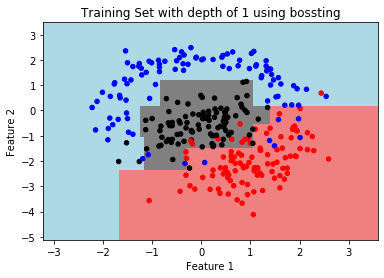

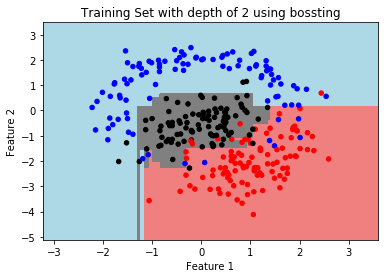

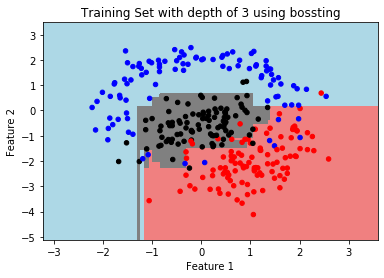

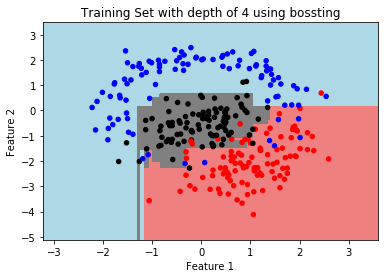

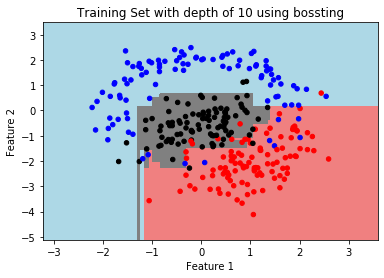

In [6]:
best_numtrees = []
for depth in [1,2,3,4,10]:
    numtreerange = [1,5,10,25,50,100,200]
    
    for num_trees in numtreerange:
        learnraterange = np.logspace(-3, 0, 15, base = 10)
        for rate in learnraterange:
            clf=GradientBoostingClassifier(learning_rate=rate,n_estimators=num_trees,max_depth=depth)
            clf.fit(train_x, train_y)

            #Report training and testing accuracies
            trainacc =  clf.score(train_x,train_y) 
            testacc = clf.score(test_x,test_y)
            if(testacc > best_score):
                best_score = testacc
                best_clf = clf
        
    Z = best_clf.predict(np.c_[x1mesh.ravel(), x2mesh.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(x1mesh.shape)

    # Plot the training points with the mesh
    plt.figure()
    plt.pcolormesh(x1mesh, x2mesh, Z, cmap=cmap_light)
    ytrain_colors = [y-1 for y in train_y]
    plt.scatter(train_x.iloc[:, 0], train_x.iloc[:, 1], c=ytrain_colors, cmap=cmap_bold, s=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('Training Set with depth of %i using bossting' % (depth))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    best_numtrees.append(best_clf.n_estimators)

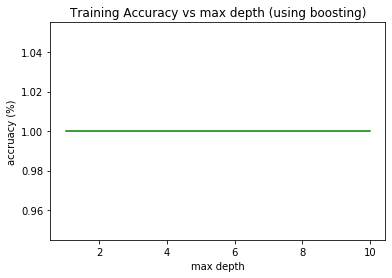

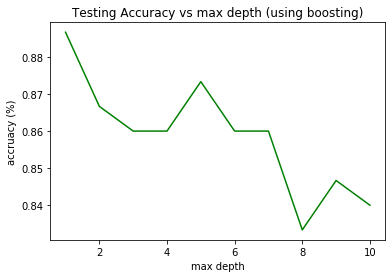

Best max_depth is 1 with a num_trees of: 200
Testing accuracies: [0.8866666666666667, 0.8666666666666667, 0.86, 0.86, 0.8733333333333333, 0.86, 0.86, 0.8333333333333334, 0.8466666666666667, 0.84]


In [7]:
train_acc_list =[]
test_acc_list = []
best_train_acc = 0
best_test_acc = 0
best_num_trees = []

for depth in range(1,11):
    best_clf = None
    
    numtreerange = [1,5,10,25,50,100,200]
    for num_trees in numtreerange:
        
        best_score = 0
        learnraterange = np.logspace(-3, 0, 15, base = 10)
        for rate in learnraterange:
            clf=GradientBoostingClassifier(learning_rate=rate,n_estimators=num_trees,max_depth=depth)

            clf.fit(train_x, train_y)

            #Report training and testing accuracies
            trainacc =  clf.score(train_x,train_y) 
            testacc = clf.score(test_x,test_y)
            if(testacc > best_score):
                best_test_acc = testacc
                best_train_acc = trainacc
                best_clf = clf
            
    best_num_trees.append(best_clf.n_estimators)
    train_acc_list.append(best_train_acc)
    test_acc_list.append(best_test_acc)   
    
plt.plot(list(range(1,11)), train_acc_list, color = 'green')
plt.title("Training Accuracy vs max depth (using boosting)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.show()

plt.plot(list(range(1,11)), test_acc_list, color = 'green')
plt.title("Testing Accuracy vs max depth (using boosting)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.show()

best_index = test_acc_list.index(max(test_acc_list)) + 1
print("Best max_depth is " + str(best_index) + " with a num_trees of: " + str(best_num_trees[best_index]))
print("Testing accuracies: " + str(test_acc_list))

In [8]:
#----------------PROBLEM 5 SET UP-----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mticker

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Extract data from CSV
train_df = pd.read_csv("digits-train.csv", header = None)
print(train_df.head())
train_y = train_df.iloc[:, 0]
train_x = train_df.iloc[:, [1,47]]

test_df = pd.read_csv("digits-test.csv", header = None)
print(test_df.head())
test_y = test_df.iloc[:, 0]
test_x = test_df.iloc[:, [1,47]]


    0       1       2        3         4         5         6         7   \
0  1.0  0.0964  0.1691  23.8873   85.4731   25.7352  183.6441   21.5507   
1  2.0  0.0367  1.7977  30.5266   79.9518  156.0943  308.4623  328.9184   
2  7.0  0.1646  0.7211  21.5527   62.7261   97.0806  106.6790  233.1936   
3  4.0  0.1869  4.7664  44.2192  175.1081  201.6581  172.8327  219.9476   
4  5.0  0.0789  2.2348  18.6027   32.8598   59.9436  382.6461  113.8390   

       8       9   ...      38        39        40       41        42  \
0  0.1464  3.8039  ...  7.9834  138.1047  246.7494   1.1800  135.7685   
1  0.1085  3.0227  ...  2.2249   47.3031   85.8625   6.2041  240.8953   
2  0.0894  6.2616  ...  8.6671   10.7541  117.9922   6.9193  248.1221   
3  0.1729  3.4354  ...  2.4856   28.2401  139.7480  19.1183  166.1316   
4  0.1547  2.0519  ...  4.6288   55.2408   59.8312   9.7843  203.7070   

         43       44        45       46        47  
0  562.7185  33.5474  184.6318  40.1482  615.9949  
1  318

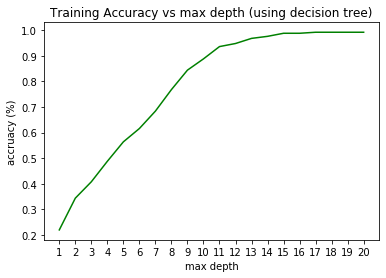

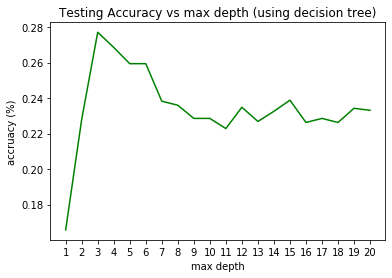

Best max_depth is 3

Testing accuracies: [0.1657142857142857, 0.228, 0.27714285714285714, 0.26857142857142857, 0.25942857142857145, 0.25942857142857145, 0.2382857142857143, 0.236, 0.22857142857142856, 0.22857142857142856, 0.22285714285714286, 0.23485714285714285, 0.22685714285714287, 0.23257142857142857, 0.23885714285714285, 0.22628571428571428, 0.22857142857142856, 0.22628571428571428, 0.2342857142857143, 0.23314285714285715]


In [19]:
train_acc_list =[]
test_acc_list = []
for depth in range(1,21):
    # we create an instance of Neighbours Classifier and fit the data.
    
    clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=depth)
    clf.fit(train_x, train_y)
    trainacc =  clf.score(train_x,train_y) 
    testacc = clf.score(test_x,test_y)
    train_acc_list.append(trainacc)
    test_acc_list.append(testacc)

plt.plot(list(range(1,21)), train_acc_list, color = 'green')
plt.title("Training Accuracy vs max depth (using decision tree)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

plt.plot(list(range(1,21)), test_acc_list, color = 'green')
plt.title("Testing Accuracy vs max depth (using decision tree)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()


best_index = test_acc_list.index(max(test_acc_list)) + 1
print("Best max_depth is " + str(best_index))
print("\nTesting accuracies: " + str(test_acc_list))

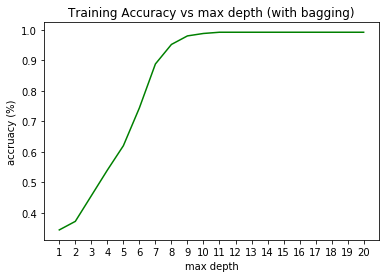

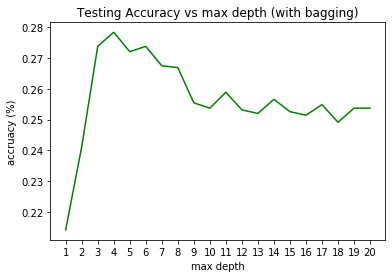

Best max_depth is 4 with a num_trees of: 200
Testing accuracies: [0.21428571428571427, 0.24114285714285713, 0.2737142857142857, 0.2782857142857143, 0.272, 0.2737142857142857, 0.2674285714285714, 0.26685714285714285, 0.25542857142857145, 0.2537142857142857, 0.25885714285714284, 0.25314285714285717, 0.252, 0.25657142857142856, 0.25257142857142856, 0.25142857142857145, 0.25485714285714284, 0.24914285714285714, 0.2537142857142857, 0.2537142857142857]


In [10]:
train_acc_list =[]
test_acc_list = []
best_train_acc = 0
best_test_acc = 0
best_num_trees = []

for depth in range(1,21):
    best_score = 0
    numtreerange = [1,5,10,25,50,100,200]
    best_clf = None
    for num_trees in numtreerange:
        clf=RandomForestClassifier(bootstrap=True,n_estimators=num_trees,max_features=None,criterion='gini',max_depth=depth)
        clf.fit(train_x, train_y)

        #Report training and testing accuracies
        trainacc =  clf.score(train_x,train_y) 
        testacc = clf.score(test_x,test_y)
        if(testacc > best_score):
            best_test_acc = testacc
            best_train_acc = trainacc
            best_clf = clf
            
    best_num_trees.append(best_clf.n_estimators)
    train_acc_list.append(best_train_acc)
    test_acc_list.append(best_test_acc)   
    
plt.plot(list(range(1,21)), train_acc_list, color = 'green')
plt.title("Training Accuracy vs max depth (with bagging)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

plt.plot(list(range(1,21)), test_acc_list, color = 'green')
plt.title("Testing Accuracy vs max depth (with bagging)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

best_index = test_acc_list.index(max(test_acc_list)) + 1
print("Best max_depth is " + str(best_index) + " with a num_trees of: " + str(best_num_trees[best_index]))
print("Testing accuracies: " + str(test_acc_list))

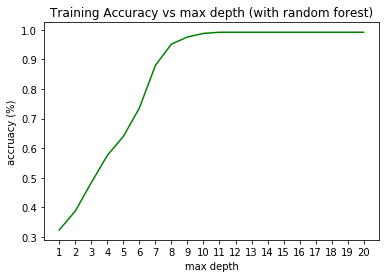

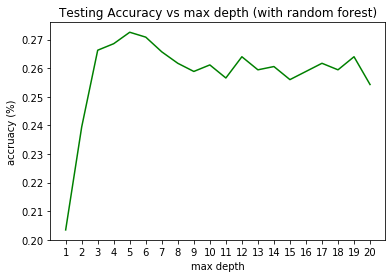

Best max_depth is 5 with a num_trees of: 200
Testing accuracies: [0.20342857142857143, 0.23942857142857144, 0.2662857142857143, 0.26857142857142857, 0.2725714285714286, 0.27085714285714285, 0.26571428571428574, 0.26171428571428573, 0.25885714285714284, 0.2611428571428571, 0.25657142857142856, 0.264, 0.25942857142857145, 0.26057142857142856, 0.256, 0.25885714285714284, 0.26171428571428573, 0.25942857142857145, 0.264, 0.2542857142857143]


In [21]:
train_acc_list =[]
test_acc_list = []
best_train_acc = 0
best_test_acc = 0
best_num_trees = []

for depth in range(1,21):
    best_score = 0
    best_clf = None
    numtreerange = [1,5,10,25,50,100,200]
    for num_trees in numtreerange:
        clf=RandomForestClassifier(bootstrap=True,n_estimators=num_trees,max_features='sqrt',criterion='gini',max_depth=depth)
        clf.fit(train_x, train_y)

        #Report training and testing accuracies
        trainacc =  clf.score(train_x,train_y) 
        testacc = clf.score(test_x,test_y)
        if(testacc > best_score):
            best_test_acc = testacc
            best_train_acc = trainacc
            best_clf = clf
            
    best_num_trees.append(best_clf.n_estimators)
    train_acc_list.append(best_train_acc)
    test_acc_list.append(best_test_acc)   
    
plt.plot(list(range(1,21)), train_acc_list, color = 'green')
plt.title("Training Accuracy vs max depth (with random forest)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

plt.plot(list(range(1,21)), test_acc_list, color = 'green')
plt.title("Testing Accuracy vs max depth (with random forest)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

best_index = test_acc_list.index(max(test_acc_list)) + 1
print("Best max_depth is " + str(best_index) + " with a num_trees of: " + str(best_num_trees[best_index]))
print("Testing accuracies: " + str(test_acc_list))

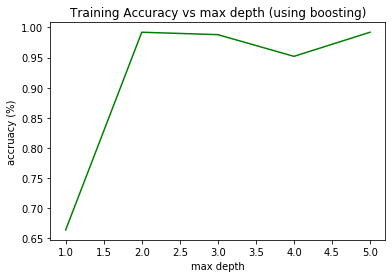

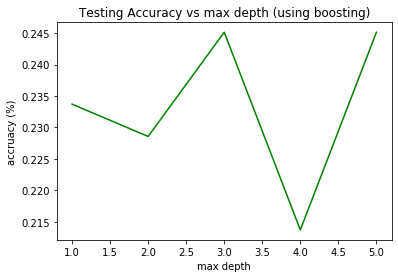

Testing accuracies: [0.2337142857142857, 0.22857142857142856, 0.24514285714285713, 0.21371428571428572, 0.24514285714285713]
Best max_depth is 3 with a num_trees of: 150


In [23]:
train_acc_list =[]
test_acc_list = []
best_train_acc = 0
best_test_acc = 0
best_num_trees = []

for depth in range(1,6):
    best_clf = None
    
    numtreerange = [50,100, 150]
    for num_trees in numtreerange:
        
        best_score = 0
        learnraterange = np.logspace(-2, 0, 15, base = 10)
        for rate in learnraterange:
            clf=GradientBoostingClassifier(learning_rate=rate,n_estimators=num_trees,max_depth=depth)

            clf.fit(train_x, train_y)

            #Report training and testing accuracies
            trainacc =  clf.score(train_x,train_y) 
            testacc = clf.score(test_x,test_y)
            if(testacc > best_score):
                best_test_acc = testacc
                best_train_acc = trainacc
                best_clf = clf
            
    best_num_trees.append(best_clf.n_estimators)
    train_acc_list.append(best_train_acc)
    test_acc_list.append(best_test_acc)   
    
plt.plot(list(range(1,6)), train_acc_list, color = 'green')
plt.title("Training Accuracy vs max depth (using boosting)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.show()

plt.plot(list(range(1,6)), test_acc_list, color = 'green')
plt.title("Testing Accuracy vs max depth (using boosting)")
plt.xlabel("max depth")
plt.ylabel("accruacy (%)")
plt.show()

best_index = test_acc_list.index(max(test_acc_list))
print("Testing accuracies: " + str(test_acc_list))
print("Best max_depth is " + str(best_index+1) + " with a num_trees of: " + str(best_num_trees[best_index + 1]))
